In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
from tensorflow.keras import regularizers

###
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()
data="""واحَرَّ قَلباهُ مِمَّن قَلبُهُ شَبِم " وَمَن بِجِسمي وَحالي عِندَهُ سَقَمُ مالي أُكَتِّمُ حُبّاً قَد بَرى جَسَدي "وَتَدَّعي حُبَّ سَيفِ الدَولَةِ الأُمَمُ إِن كانَ يَجمَعُنا حُبٌّ لِغُرَّتِهِ" فَلَيتَ أَنّا بِقَدرِ الحُبِّ نَقتَسِمُ قَد زُرتُهُ وَسُيوفُ الهِندِ مُغمَدَة "وَقَد نَظَرتُ إِلَيهِ وَالسُيوفُ دَمُ فَكانَ أَحسَنَ خَلقِ اللَهِ كُلِّهِمِ*"وَكانَ أَحسَنَ مافي الأَحسَنِ الشِيَمُ فَوتُ العَدُوِّ الَّذي يَمَّمتَهُ ظَفَرٌ" في طَيِّهِ أَسَفٌ في طَيِّهِ نِعَمُ قَد نابَ عَنكَ شَديدُ الخَوفِ وَاِصطَنَعَت "لَكَ المَهابَةُ مالا تَصنَعُ البُهَمُ أَلزَمتَ نَفسَكَ شَيئاً لَيسَ يَلزَمُها ...أَن لا يُوارِيَهُم أَرضٌ وَلا عَلَمُ أَكُلَّما رُمتَ جَيشاً فَاِنثَنى هَرَباً ... تَصَرَّفَت بِكَ في آثارِهِ الهِمَمُ عَلَيكَ هَزمُهُمُ في كُلِّ مُعتَرَكٍ ... وَما عَلَيكَ بِهِم عارٌ إِذا اِنهَزَموا أَما تَرى ظَفَراً حُلواً سِوى ظَفَرٍ"تَصافَحَت فيهِ بيضُ الهِندِ وَاللِمَمُ يا أَعدَلَ الناسِ إِلّا في مُعامَلَتي ... فيكَ الخِصامُ وَأَنتَ الخَصمُ وَالحَكَمُ أُعيذُها نَظَراتٍ مِنكَ صادِقَةً ...أَن تَحسَبَ الشَحمَ فيمَن شَحمُهُ وَرَمُ وَما اِنتِفاعُ أَخي الدُنيا بِناظِرِهِ ... إِذا اِستَوَت عِندَهُ الأَنوارُ وَالظُلَمُ أَنا الَّذي نَظَرَ الأَعمى إِلى أَدَبي ... وَأَسمَعَت كَلِماتي مَن بِهِ صَمَمُ أَنامُ مِلءَ جُفوني عَن شَوارِدِها ... وَيَسهَرُ الخَلقُ جَرّاها وَيَختَصِمُ وَجاهِلٍ مَدَّهُ في جَهلِهِ ضَحِكي ... حَتّى أَتَتهُ يَدٌ فَرّاسَةٌ وَفَمُ إِذا نَظَرتَ نُيوبَ اللَيثِ بارِزَةً ... فَلا تَظُنَّنَّ أَنَّ اللَيثَ مُبتَسِمُ ا مَن يَعِزُّ عَلَينا أَن نُفارِقَهُم ... وِجدانُنا كُلَّ شَيءٍ بَعدَكُم عَدَمُ ما كانَ أَخلَقَنا مِنكُم بِتَكرُمَةٍ ... لَو أَنَّ أَمرَكُمُ مِن أَمرِنا أَمَمُ إِن كانَ سَرَّكُمُ ما قالَ حاسِدُنا ... فَما لِجُرحٍ إِذا أَرضاكُمُ أَلَمُ وهده أبيات أخرى من جميل أشعار المتنبي الخالدة : مَلُومُكُمَا يَجِلُّ عن المَلامِ ... وَوَقْعُ فَعَالِهِ فَوْقَ الكَلامِ ذَرَاني والفَلاةَ بلا دَلِيلٍ ... وَوَجْهِي والهَجِيرَ بلا لِثَامِ فإِنِّي أَسْتَرِيحُ بِذِي وهَذَا ... وَأَتْعَبُ بَالإِنَاخَةِ والمُقَامِ عُيُونُ رَوَاحِلِي إِن حِرْتُ عَيْني ... وَكُلُّ بُغَامِ رَازِحَةٍ بُغَامِي فَقَدْ أَرِدُ المِيَاهَ بِغَيْرِ هَادٍ ... سِوَى عَدِّي لَهَا بَرْقَ الغَمَامِ يُذِمُّ لِمُهْجَتي رَبِّي وَسَيْفِي ... إِذَا احْتَاجَ الوَحِيدُ إِلَى الذِّمَامِ ولا أُمْسِي لأَهْلِ البُخْلِ ضَيْفًا ... وَلَيْسَ قِرًى سِوَى مُخِّ النَّعَامِ وَلَمَّا صَارَ وُدُّ النَّاسِ خِبًّا ... جَزَيْتُ عَلَى ابْتِسَامٍ بِابْتِسَام وَصِرْتُ أَشُكُّ فِيمَنْ أَصْطَفِيهِ ... لِعِلْمِي أَنَّهُ بَعْضُ الأَنَامِ ومن أشعاره الخالدة أيضا : لا تشـتَـرِالـعَـبيـد إلا والـعَـصَـا مـعــه .. إِن الـعَـبِـيــدَ لأنـــجــاسٌ مَـنـاكــيــد مـا كُنـتُ أَحسَبُنـي أَحيـا إلـى زَمَـن .. ٍيُسـيء بـي فيـهِ عَبـد وَهْـوَ مَحمـودُ وَلا تَوهـمـتُ أَن الـنـاس قَــدْ فُـقِـدُوا .. وأًن مِـثْــلَ أَبـــي البـيـضـاءِ مَــوجــودُ وأَنَّ ذَا الأَسْــوَدَ المَثْـقـوبَ مـشْـفَـرُهُ .. تـطِـيـعُـهُ ذي الـعَـضـارِيـطُ الـرعـادِيــد جَوعـانُ يأكـلُ مِـن زادي ويُمِسكُنـي ... لِـكَـي يُـقـالَ عَظِـيـمُ الـقـدرِ مَقـصُـودُ وَيـلُـمِّـهـا خُــطَّـــةً وَيــلُـــم قـابـلِـهــا.. لِمِثْـلِـهـا خُــلِــقَ المهريَّـةُالــقُــودُ وعِندَهـا لَــذَّ طَـعْـم الـمـوتِ شـارِبُـهُ .. إِن الـمَـنِـيَّـةَ عِــنْــدَ الــــذُلّ قِـنـديــدُ مَن علَّـم الأسـودَ المَخْصِـيَّ مكرُمـة ... أَقَـومُــهُ الـبِـيـضُ أَمْ آبــــاؤهُ الـصِـيــدُ أم أُذْنُــه فــي يــدِ النّـخَّـاسِ دامِـيــةً ... أَم قَــدْرهُ وَهــوَ بِالفِلـسَـيْـنِ مَـــردُودُ أولَـــى الـلِـئــام كُـوَيـفـيـرٌ بِـمَـعــذِرَة ... فـي كُـلِّ لُـؤْم وبَـعـض الـعُـذْرِ تَفنِـيـدُ
"""
corpus = data.lower().split("...")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
print(len(predictors))
print(predictors)
print(tokenizer.word_index)

In [ ]:
model = Sequential()
model.add(Embedding(total_words,128, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words/2,activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words,activation="softmax"))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 77, 128)           48000     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 77, 300)           334800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 77, 300)           0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 200)               320800    
_________________________________________________________________
dense_14 (Dense)             (None, 187)               37587     
_________________________________________________________________
dense_15 (Dense)             (None, 375)               70500     
Total params: 811,687
Trainable params: 811,687
Non-trainable params: 0
_______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=500, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 87ms/step - loss: 4.5169 - accuracy: 0.0262
Epoch 2/500
12/12 [==============================] - 1s 88ms/step - loss: 4.4691 - accuracy: 0.0340
Epoch 3/500
12/12 [==============================] - 1s 87ms/step - loss: 4.4142 - accuracy: 0.0314
Epoch 4/500
12/12 [==============================] - 1s 88ms/step - loss: 4.3615 - accuracy: 0.0393
Epoch 5/500
12/12 [==============================] - 1s 88ms/step - loss: 4.3025 - accuracy: 0.0314
Epoch 6/500
12/12 [==============================] - 1s 88ms/step - loss: 4.2710 - accuracy: 0.0340
Epoch 7/500
12/12 [==============================] - 1s 88ms/step - loss: 4.2395 - accuracy: 0.0471
Epoch 8/500
12/12 [==============================] - 1s 87ms/step - loss: 4.1811 - accuracy: 0.0340
Epoch 9/500
12/12 [==============================] - 1s 88ms/step - loss: 4.1376 - accuracy: 0.0262
Epoch 10/500
12/12 [==============================] - 1s 88ms/step - loss: 4.1124 - accuracy: 0.0602

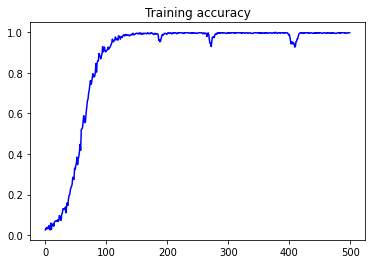

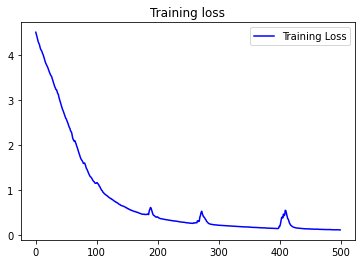

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "لا تشـتَـرِالـعَـبيـد  "


next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)